In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline


In [5]:
import sys
sys.executable

'/home/manish/anaconda2/bin/python'

In [12]:
train_df = pd.read_csv("data/mnist/train.csv")
test_df = pd.read_csv("data/mnist/test.csv")

In [14]:
df = pd.DataFrame(train_df)
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_df_X = train_df.drop("label",axis =1)

In [21]:
X_train = train_df_X.values
X_test  = test_df.values
y_train = train_df["label"].values

X_train.shape

(42000, 784)

In [19]:
X_train_images = X_train.reshape(-1,28,28)
X_train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

3


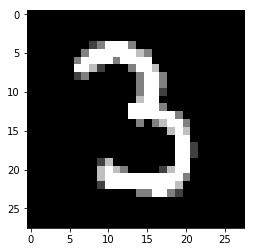

In [23]:
random_index = np.random.randint(0,len(y_train))

plt.imshow(X_train_images[random_index],cmap="gray")

print y_train[random_index]

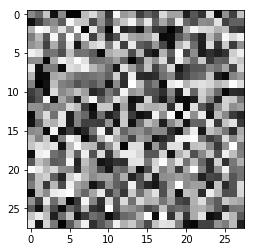

In [24]:
abc = np.random.randint(0,255,(28,28))

plt.imshow(abc, cmap="gray")

In [25]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [26]:
def create_model():
    
    m =Sequential()
    m.add(Dense(16,input_dim =784,activation="relu"))
    m.add(Dense(16,activation="relu"))
    m.add(Dense(10,activation="softmax"))
    
    return m

In [29]:
model = create_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=0.001),metrics=["acc"]) #categorical_crossentropy #mse

In [62]:
from keras.utils import np_utils

y_lh = np_utils.to_categorical(y_train)

y_lh

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [63]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [64]:
history = model.fit(X_train,y_lh, epochs=50,batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 2s 37us/step - loss: 7.5132 - acc: 0.4794
Epoch 2/50
42000/42000 [==============================] - 1s 33us/step - loss: 4.8964 - acc: 0.6287
Epoch 3/50
42000/42000 [==============================] - 1s 32us/step - loss: 4.1432 - acc: 0.6806
Epoch 4/50
42000/42000 [==============================] - 1s 34us/step - loss: 3.8692 - acc: 0.6940
Epoch 5/50
42000/42000 [==============================] - 1s 33us/step - loss: 2.6423 - acc: 0.7251
Epoch 6/50
42000/42000 [==============================] - 1s 33us/step - loss: 1.2213 - acc: 0.7796
Epoch 7/50
42000/42000 [==============================] - 1s 33us/step - loss: 0.9042 - acc: 0.8002
Epoch 8/50
42000/42000 [==============================] - 1s 33us/step - loss: 0.7657 - acc: 0.8152
Epoch 9/50
42000/42000 [==============================] - 1s 33us/step - loss: 0.6805 - acc: 0.8299
Epoch 10/50
42000/42000 [==============================] - 1s 34us/step - loss: 0.6208 - acc: 0.8414

In [65]:
def  vis(h):
    
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

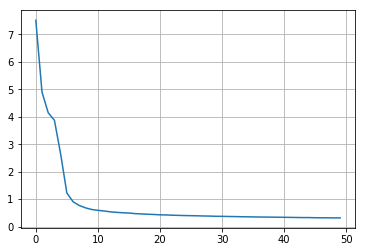

In [66]:
vis(history)

In [67]:


predictions = model.predict(X_test)

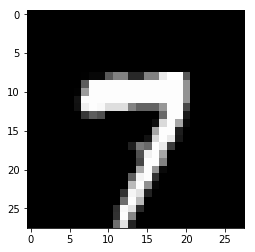

In [68]:
test_X_image = X_test.reshape(-1,28,28)

random_index = np.random.randint(0,len(X_test))

plt.imshow(test_X_image[random_index],cmap="gray")

In [71]:
print np.arange(10)

print np.round(predictions[random_index])

[0 1 2 3 4 5 6 7 8 9]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [77]:

output = model.predict(X_test).astype(float)


output_df = pd.DataFrame(output)

output_df
# df_output = pd.DataFrame()
# df_output['Digit'] = train_df["label"]
# df_output['Accuracy'] = output
# df_output[['Digit','Accuracy']].to_csv('data/output.csv',index=False)

,0,1,2,3,4,5,6,7,8,9
0,6.460715e-09,1.478070e-04,9.996214e-01,1.360096e-04,1.208525e-11,3.019759e-09,6.441065e-05,8.521221e-06,2.129835e-05,5.540839e-07
1,9.998784e-01,3.151255e-15,4.952645e-07,4.658357e-07,2.711314e-22,4.372089e-06,6.821517e-05,4.449625e-10,4.317068e-11,4.803456e-05
2,1.543599e-02,1.173661e-03,3.900824e-03,1.780057e-02,6.585753e-02,2.937692e-03,1.088559e-04,5.018689e-02,7.415950e-02,7.684385e-01
3,2.170831e-02,8.285862e-09,3.185012e-02,3.914140e-05,2.694035e-01,2.567139e-13,2.960577e-03,1.331572e-02,5.555157e-05,6.606672e-01
4,7.079945e-05,1.254699e-02,5.251594e-01,4.579284e-01,3.487457e-12,6.361701e-04,4.582089e-04,6.870486e-07,3.083022e-03,1.163634e-04
5,3.104192e-05,9.837461e-05,1.046747e-04,5.268984e-04,1.147022e-04,5.787779e-05,4.314414e-09,9.004577e-01,1.151595e-04,9.849348e-02
6,9.999973e-01,1.610956e-21,2.223132e-11,2.152242e-09,9.425640e-27,2.434720e-09,1.401426e-06,2.609627e-14,3.251898e-14,1.345321e-06
7,4.644751e-08,4.152819e-07,6.179555e-07,9.999104e-01,9.440517e-18,6.285316e-07,1.405894e-07,4.037109e-15,8.767923e-05,1.413994e-08
8,9.999465e-01,5.879952e-16,3.072758e-08,1.434201e-06,3.433906e-25,2.473606e-05,1.965994e-05,2.958448e-12,2.032954e-11,7.680873e-06
9,6.888741e-13,1.173509e-09,3.681229e-08,9.954229e-01,1.008371e-16,4.575292e-03,1.227148e-06,2.594585e-10,4.791511e-07,8.405505e-11
